In [1]:
import subprocess
import os
import re


def run_lammps_simulation(input_file, output_file, seed):
    # Modify the input file to include the random seed
    with open(input_file, 'r') as file:
        data = file.readlines()
    
    # Find the line where the random seed is set and modify it
    for i, line in enumerate(data):
        if 'velocity     all create' in line:
            data[i] = f"velocity     all create 300.0 {seed} mom yes rot yes dist gaussian\n"
            break
    
    # Write the modified input file
    with open(input_file, 'w') as file:
        file.writelines(data)
    
    # Run the LAMMPS simulation
    subprocess.run(['lmp_serial', '-in', input_file])

    # After running, extract the thermal conductivity value from the output file
    with open(output_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Look for the line that contains 'average conductivity'
            if 'average conductivity' in line:
                # Extract the numeric value using a regex pattern
                match = re.search(r'average conductivity: ([0-9.e+-]+)', line)
                if match:
                    k_value = float(match.group(1))  # Extracted value
                    return k_value
    
    return None

def run_simulations(input_file, output_file, num_runs):
    results = []
    for i in range(num_runs):
        seed = 102486 + i  # You can use any formula for the seed, or randomize
        print(f"Running simulation {i+1} with seed {seed}")
        k_value = run_lammps_simulation(input_file, output_file, seed)
        if k_value is not None:
            results.append(k_value)
        else:
            print(f"Simulation {i+1} failed to extract conductivity.")
    
    return results

In [2]:
# Define the paths to files
input_file_hom = 'pressure_hom.txt'
output_file_hom = 'log.lammps'  # output filename

# Run the simulations
results = run_simulations(input_file_hom, output_file_hom, 10)  # Run 10 simulations

# Print the results
print("Thermal conductivity results:")
for i, k in enumerate(results, 1):
    print(f"Run {i}: {k} W/mK")

Running simulation 1 with seed 102486
Running simulation 2 with seed 102487
Running simulation 3 with seed 102488
Running simulation 4 with seed 102489
Running simulation 5 with seed 102490
Running simulation 6 with seed 102491
Running simulation 7 with seed 102492
Running simulation 8 with seed 102493
Running simulation 9 with seed 102494
Running simulation 10 with seed 102495
Thermal conductivity results:
Run 1: 0.244489897107247 W/mK
Run 2: 0.250525184566345 W/mK
Run 3: 0.252031211623638 W/mK
Run 4: 0.261921130455234 W/mK
Run 5: 0.246312727387426 W/mK
Run 6: 0.238258551182505 W/mK
Run 7: 0.257519778209373 W/mK
Run 8: 0.259383984803866 W/mK
Run 9: 0.227171850848178 W/mK
Run 10: 0.234615556581908 W/mK


In [3]:
results_hom=results
print(results_hom)

[0.244489897107247, 0.250525184566345, 0.252031211623638, 0.261921130455234, 0.246312727387426, 0.238258551182505, 0.257519778209373, 0.259383984803866, 0.227171850848178, 0.234615556581908]


In [4]:
# Define the paths to files
input_file_mix1 = 'pressure_mixed_1.txt'
output_file_mix1 = 'log.lammps'  # output filename

# Run the simulations
results_mix1 = run_simulations(input_file_mix1, output_file_mix1, 10)  # Run 10 simulations

# Print the results
print("Thermal conductivity results:")
for i, k in enumerate(results, 1):
    print(f"Run {i}: {k} W/mK")

Running simulation 1 with seed 102486
Running simulation 2 with seed 102487
Running simulation 3 with seed 102488
Running simulation 4 with seed 102489
Running simulation 5 with seed 102490
Running simulation 6 with seed 102491
Running simulation 7 with seed 102492
Running simulation 8 with seed 102493
Running simulation 9 with seed 102494
Running simulation 10 with seed 102495
Thermal conductivity results:
Run 1: 0.244489897107247 W/mK
Run 2: 0.250525184566345 W/mK
Run 3: 0.252031211623638 W/mK
Run 4: 0.261921130455234 W/mK
Run 5: 0.246312727387426 W/mK
Run 6: 0.238258551182505 W/mK
Run 7: 0.257519778209373 W/mK
Run 8: 0.259383984803866 W/mK
Run 9: 0.227171850848178 W/mK
Run 10: 0.234615556581908 W/mK


In [5]:
print(results_mix1)

[0.237481191332691, 0.224731931893129, 0.246020190819497, 0.255223875756399, 0.227576821565241, 0.24747532449001, 0.260917033086637, 0.262443336467263, 0.242801138036337, 0.248204523348191]


In [14]:
# Define the paths to files
input_file_mix2 = 'pressure_mixed_2.txt'
output_file_mix2 = 'log.lammps'  # output filename

# Run the simulations
results_mix2 = run_simulations(input_file_mix2, output_file_mix2, 10)  # Run 10 simulations

# Print the results
print("Thermal conductivity results:")
for i, k in enumerate(results_mix2, 1):
    print(f"Run {i}: {k} W/mK")

Running simulation 1 with seed 102486
Running simulation 2 with seed 102487
Running simulation 3 with seed 102488
Running simulation 4 with seed 102489
Running simulation 5 with seed 102490
Running simulation 6 with seed 102491
Running simulation 7 with seed 102492
Running simulation 8 with seed 102493
Running simulation 9 with seed 102494
Running simulation 10 with seed 102495
Thermal conductivity results:
Run 1: 0.268254760233939 W/mK
Run 2: 0.266494843159522 W/mK
Run 3: 0.269965027847079 W/mK
Run 4: 0.263294011453189 W/mK
Run 5: 0.237054574556742 W/mK
Run 6: 0.248739246462696 W/mK
Run 7: 0.232495762010466 W/mK
Run 8: 0.207081279993575 W/mK
Run 9: 0.282000371666734 W/mK
Run 10: 0.24521380879418 W/mK


In [15]:
print(results_mix2)

[0.268254760233939, 0.266494843159522, 0.269965027847079, 0.263294011453189, 0.237054574556742, 0.248739246462696, 0.232495762010466, 0.207081279993575, 0.282000371666734, 0.24521380879418]


In [16]:
# Define the paths to files
input_file_mix3 = 'pressure_mixed_3.txt'
output_file_mix3 = 'log.lammps'  # output filename

# Run the simulations
results_mix3 = run_simulations(input_file_mix3, output_file_mix3, 10)  # Run 10 simulations

# Print the results
print("Thermal conductivity results:")
for i, k in enumerate(results_mix3, 1):
    print(f"Run {i}: {k} W/mK")

Running simulation 1 with seed 102486
Running simulation 2 with seed 102487
Running simulation 3 with seed 102488
Running simulation 4 with seed 102489
Running simulation 5 with seed 102490
Running simulation 6 with seed 102491
Running simulation 7 with seed 102492
Running simulation 8 with seed 102493
Running simulation 9 with seed 102494
Running simulation 10 with seed 102495
Thermal conductivity results:
Run 1: 0.26500212386019 W/mK
Run 2: 0.246523023308999 W/mK
Run 3: 0.243120262673011 W/mK
Run 4: 0.233379992340363 W/mK
Run 5: 0.268208357360798 W/mK
Run 6: 0.278154940474062 W/mK
Run 7: 0.235164054276922 W/mK
Run 8: 0.280981249269857 W/mK
Run 9: 0.280140640904221 W/mK
Run 10: 0.287096018700229 W/mK


In [17]:
print(results_mix3)

[0.26500212386019, 0.246523023308999, 0.243120262673011, 0.233379992340363, 0.268208357360798, 0.278154940474062, 0.235164054276922, 0.280981249269857, 0.280140640904221, 0.287096018700229]


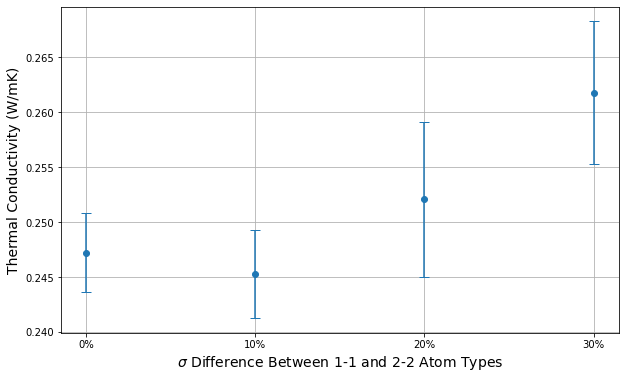

In [25]:
import numpy as np
import matplotlib.pyplot as plt

results_hom=results_hom
results_pm10=results_mix1
results_pm20=results_mix2
results_pm30=results_mix3

# Compute mean and SEM
mean_hom = np.mean(results_hom)
std_dev_hom = np.std(results_hom, ddof=1)  # Sample standard deviation (N-1)
sem_hom = std_dev_hom / np.sqrt(len(results_hom))

mean_pm10 = np.mean(results_pm10)
std_dev_pm10 = np.std(results_pm10, ddof=1)  # Sample standard deviation (N-1)
sem_pm10 = std_dev_pm10 / np.sqrt(len(results_pm10))

mean_pm20 = np.mean(results_pm20)
std_dev_pm20 = np.std(results_pm20, ddof=1)  # Sample standard deviation (N-1)
sem_pm20 = std_dev_pm20 / np.sqrt(len(results_pm20))

mean_pm30 = np.mean(results_pm30)
std_dev_pm30 = np.std(results_pm30, ddof=1)  # Sample standard deviation (N-1)
sem_pm30 = std_dev_pm30 / np.sqrt(len(results_pm30))

x_data=("0%", "10%", "20%", "30%")
res = [mean_hom, mean_pm10, mean_pm20, mean_pm30]
error= [sem_hom, sem_pm10, sem_pm20, sem_pm30]

# Plot mean with error bar
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, res, yerr=error, fmt='o', capsize=5)
plt.xlabel(r'$\sigma$ Difference Between 1-1 and 2-2 Atom Types', fontsize=14)
plt.ylabel('Thermal Conductivity (W/mK)', fontsize=14)
plt.grid(True)
plt.savefig('pressure_tc_plot.pdf')
plt.show()

In [24]:
print(np.mean(results_hom))
print(np.mean(results_pm10))
print(np.mean(results_pm20))
print(np.mean(results_pm30))

0.24722298727657196
0.24528753667953945
0.2520593686178122
0.2617770663168652
